# Análisis Exploratorio de Datos

See, fork, and run a random forest benchmark model through Kaggle Scripts

You are provided hourly rental data spanning two years. For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

Data Fields
* `datetime` - hourly date + timestamp
* `season` -  1 = spring, 2 = summer, 3 = fall, 4 = winter
* `holiday` - whether the day is considered a holiday
* `workingday` - whether the day is neither a weekend nor holiday
* `weather` -
    * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* `temp` - temperature in Celsius
* `atemp` - "feels like" temperature in Celsius
* `humidity` - relative humidity
* `windspeed` - wind speed
* `casual` - number of non-registered user rentals initiated
* `registered` - number of registered user rentals initiated
* `count` - number of total rentals

## Librerías

In [1]:
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [29]:
sns.set_style("darkgrid")

## Importar DataSet

In [2]:
# data = pd.read_csv("/kaggle/input/bike-sharing-demand/train.csv")
data = pd.read_csv("../data/train.csv")
data["datetime"] = pd.to_datetime(data["datetime"])

In [3]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


* `datetime` - hourly date + timestamp
* `season` -  1 = spring, 2 = summer, 3 = fall, 4 = winter
* `holiday` - whether the day is considered a holiday
* `workingday` - whether the day is neither a weekend nor holiday
* `weather` -
    * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* `temp` - temperature in Celsius
* `atemp` - "feels like" temperature in Celsius
* `humidity` - relative humidity
* `windspeed` - wind speed
* `casual` - number of non-registered user rentals initiated
* `registered` - number of registered user rentals initiated
* `count` - number of total rentals

In [4]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [42]:
df = data.copy()
df.set_index("datetime", inplace=True)
df.asfreq("1H")
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [43]:
len(data), len(df)

(10886, 10886)

In [44]:
df.season.unique()

array([1, 2, 3, 4], dtype=int64)

In [45]:
df.workingday.unique()

array([0, 1], dtype=int64)

In [46]:
df.weather.unique()

array([1, 2, 3, 4], dtype=int64)

In [47]:
df.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [48]:
df.atemp.describe()

count    10886.000000
mean        23.655084
std          8.474601
min          0.760000
25%         16.665000
50%         24.240000
75%         31.060000
max         45.455000
Name: atemp, dtype: float64

Comparación de la temperatura real vs. la temperatura "de cómo se siente"

In [52]:
from datetime import timedelta
ti, tf = df.index[0], df.index[0] + timedelta(days=365)

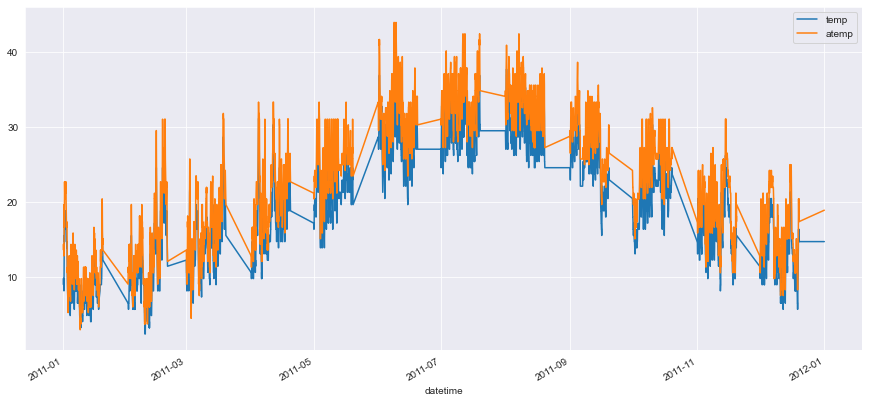

In [53]:
_ = plt.figure(figsize=(15, 7))
df.temp[ti:tf].plot()
df.atemp[ti:tf].plot()
plt.legend()
plt.show()

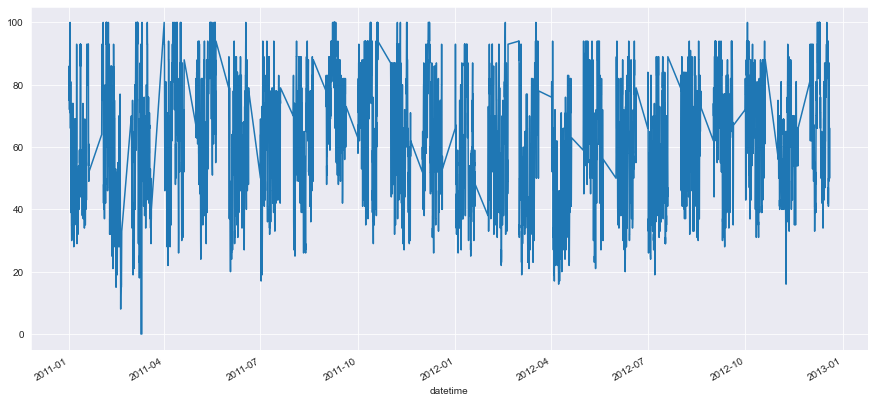

In [32]:
_ = plt.figure(figsize=(15, 7))
df.humidity.plot()
plt.show()

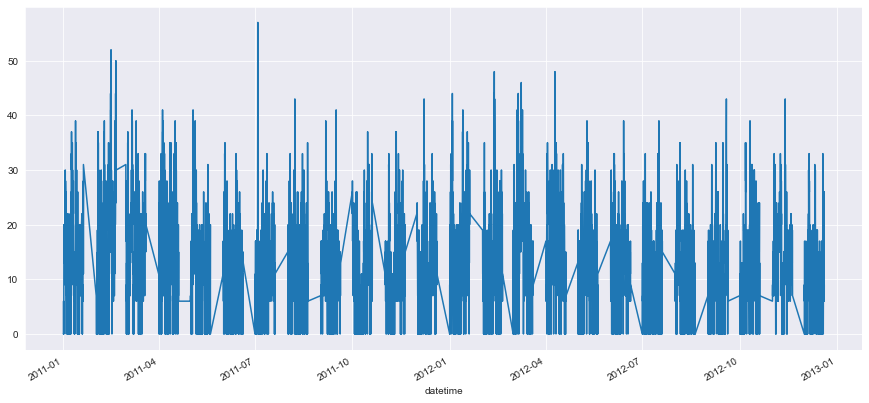

In [33]:
_ = plt.figure(figsize=(15, 7))
df.windspeed.plot()
plt.show()

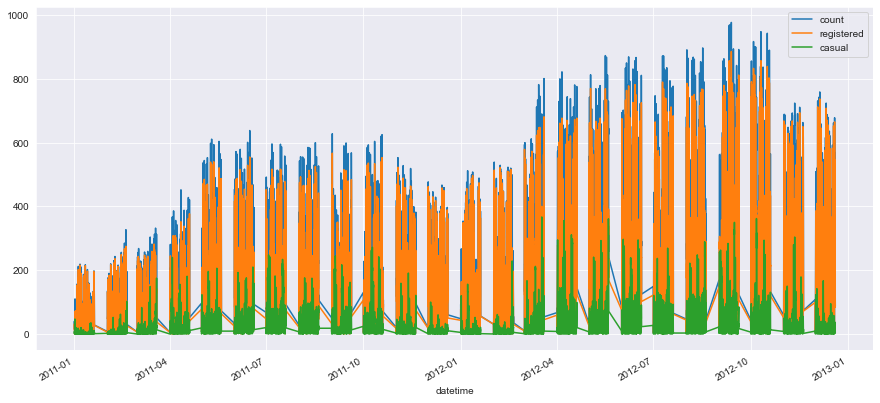

In [38]:
_ = plt.figure(figsize=(15, 7))
df["count"].plot()
df.registered.plot()
df.casual.plot()
plt.legend()
plt.show()

In [41]:
(df.index[-1] - df.index[0])/7

Timedelta('102 days 17:00:00')

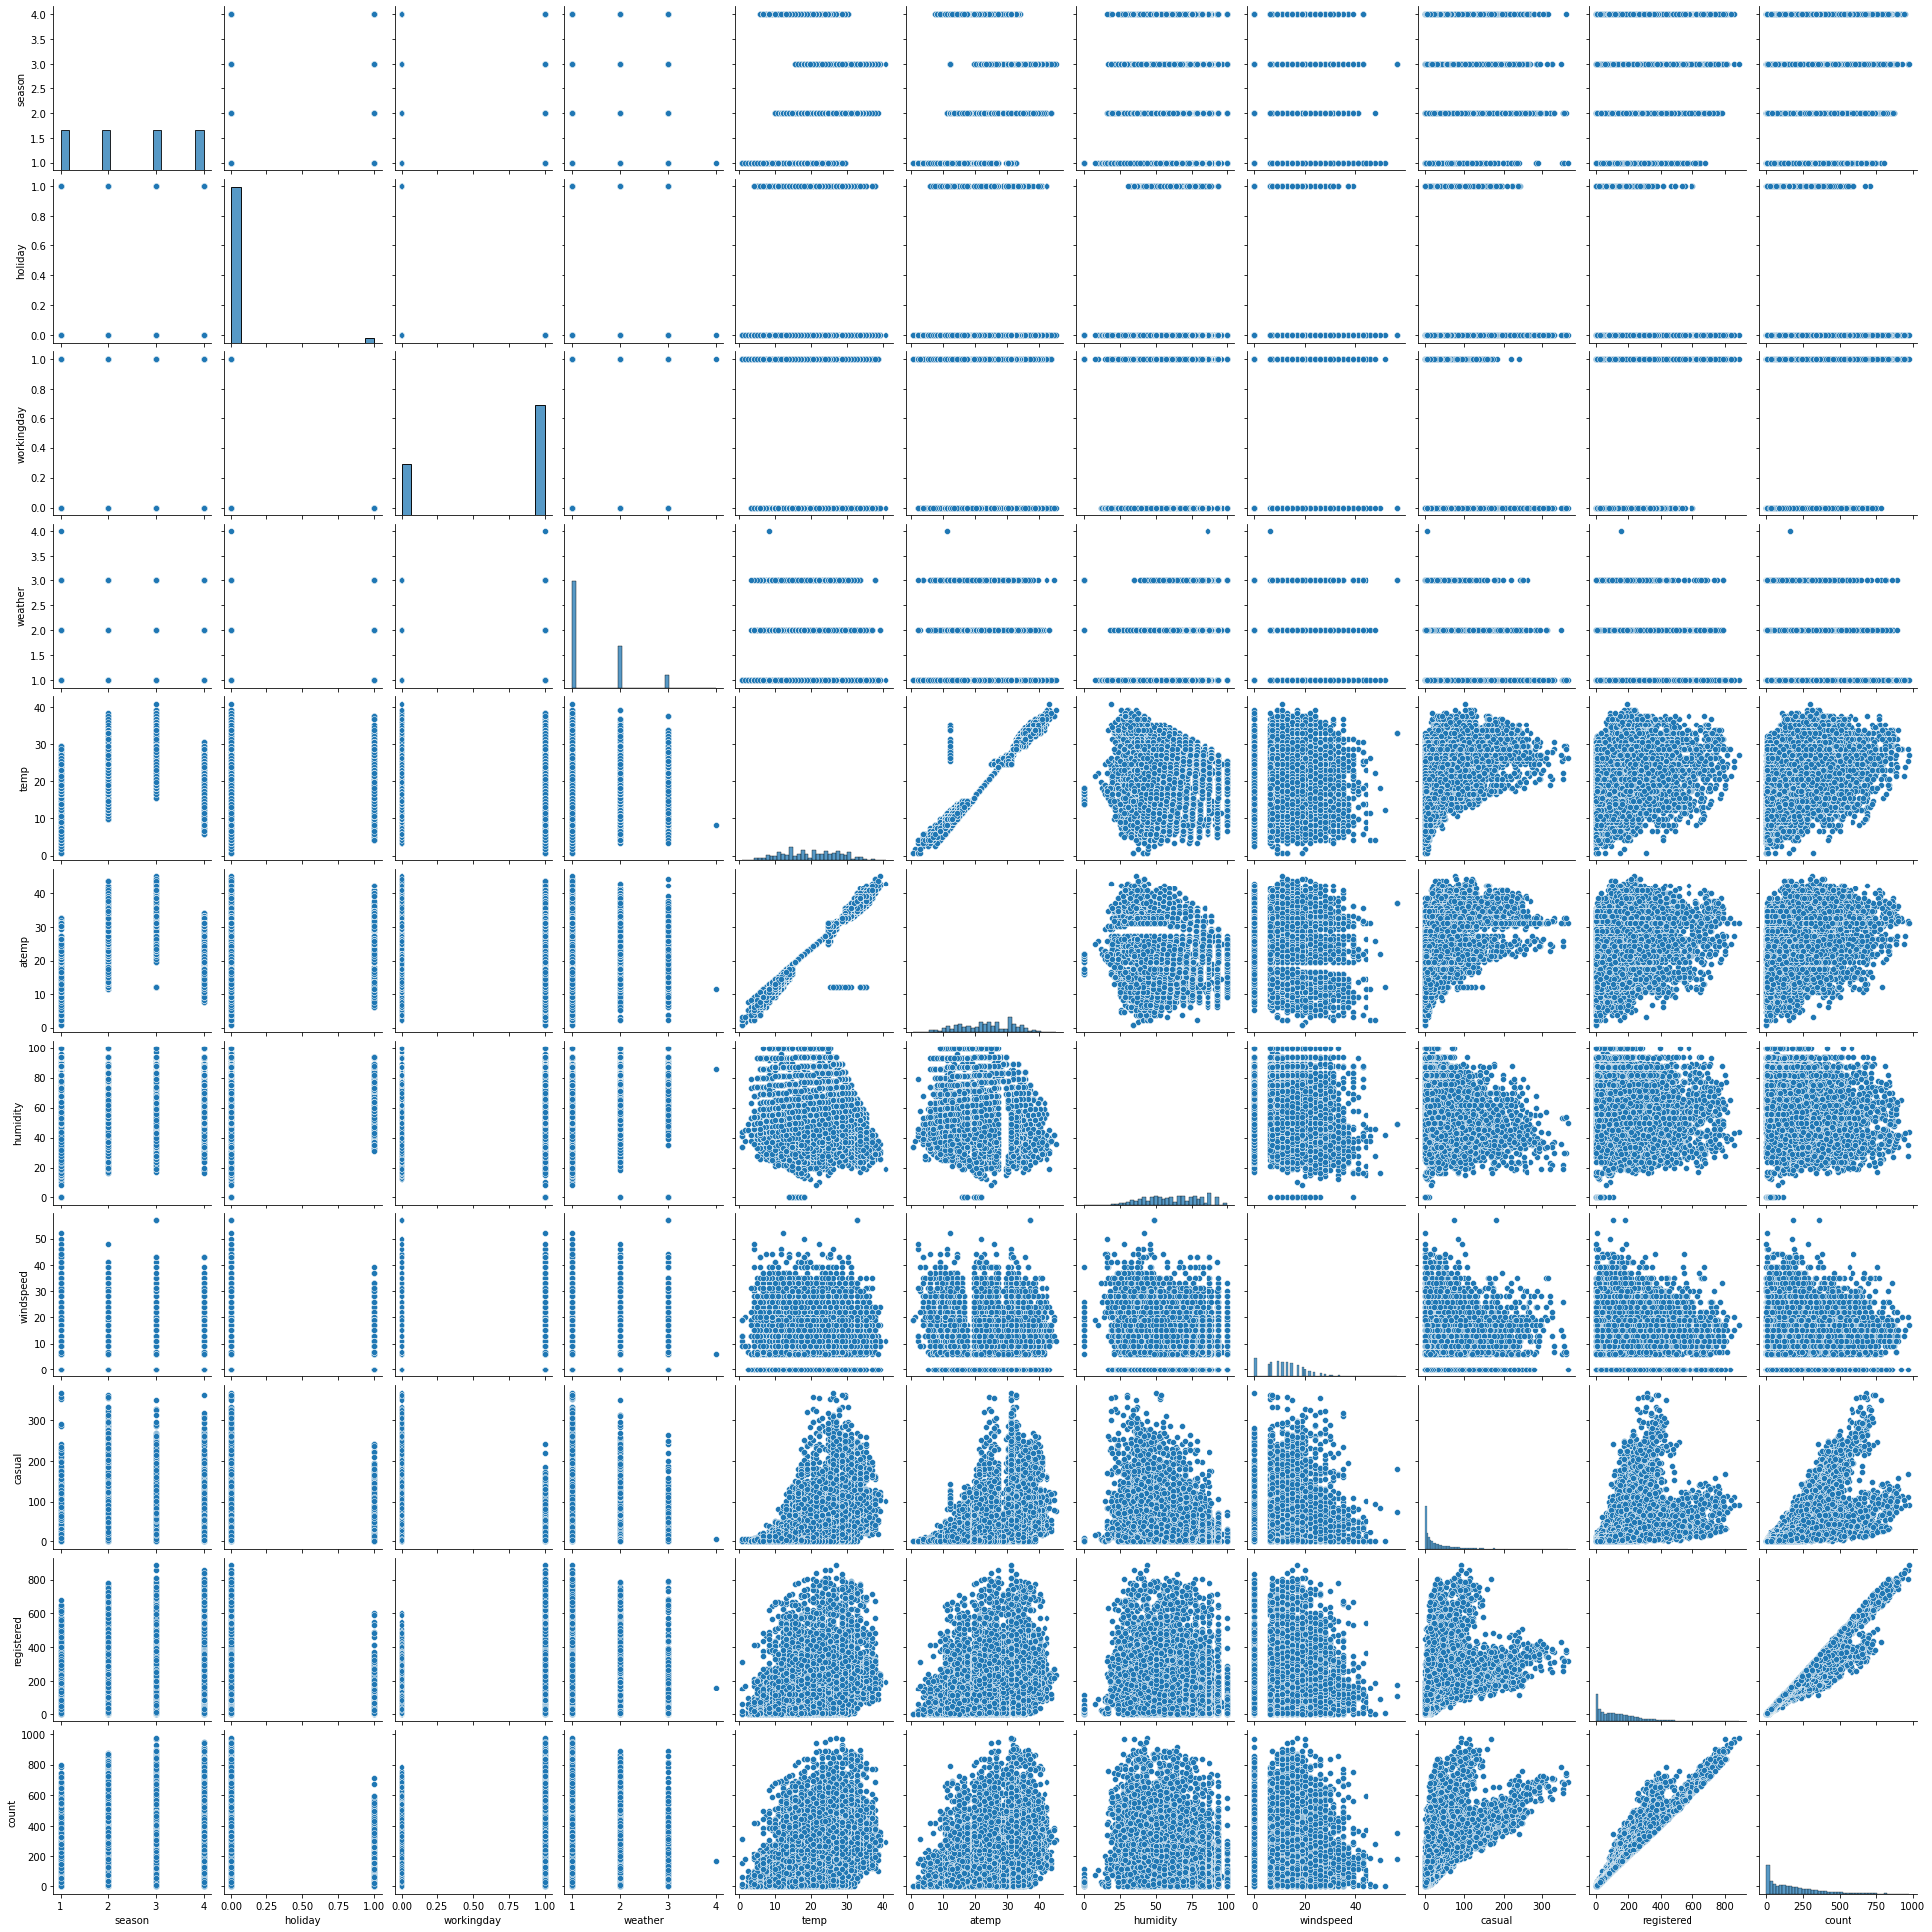

In [5]:
sns.pairplot(data)
plt.show()

In [9]:
holiday = data[data.holiday == 1]
no_holiday = data[data.holiday == 0]
working = data[data.workingday == 1]
no_working = data[data.workingday == 0]

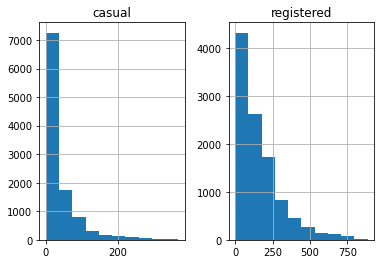

In [10]:
cols = ["casual", "registered"]
no_holiday[cols].hist();

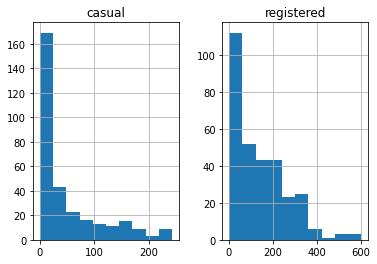

In [11]:
holiday[cols].hist();

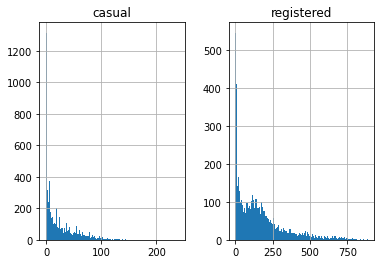

In [12]:
working[cols].hist(bins=200);

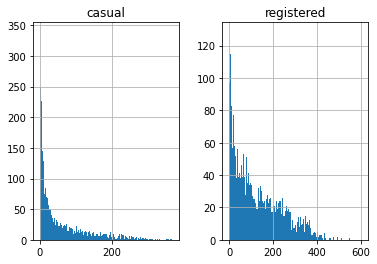

In [13]:
no_working[cols].hist(bins=200);

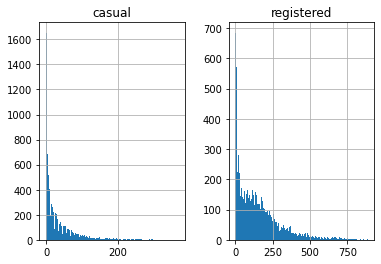

In [14]:
data[cols].hist(bins=200);

In [15]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [16]:
%matplotlib inline

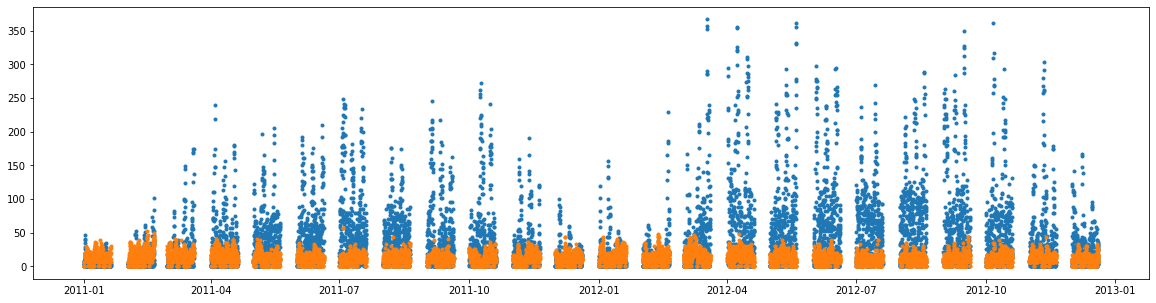

In [17]:
plt.figure(figsize=(20,5))
plt.plot(data["datetime"].values[:], data["casual"].values[:], ".", )
plt.plot(data["datetime"].values[:], data["windspeed"].values[:], ".")
